In [1]:
import pickle as pk
import glob
from utils.utils import graph_plot
from graph_model import LightningEGNN_net
import torch
from pathlib import Path

In [2]:
dir='./'

TRAIN_DATA_FILES=glob.glob(dir +"*_train.pt")
VAL_DATA_FILES=glob.glob(dir+"*_val.pt")
train_dataset=None
for TRAIN_DATA_FILE in TRAIN_DATA_FILES:
    with open(TRAIN_DATA_FILE, 'rb') as f:
        if train_dataset is None:
            train_dataset = pk.load(f)
        else:
            train_dataset+=pk.load(f)

val_dataset = None
for VAL_DATA_FILE in VAL_DATA_FILES:
    with open(VAL_DATA_FILE, 'rb') as f:
        if val_dataset is None:
            val_dataset = pk.load(f)
        else:
            val_dataset+=pk.load(f)   
            
print('train',len(train_dataset))   

train 10


In [ ]:

artifact_dir="model/EGNN_best_model.ckpt"
model_file = Path(artifact_dir)

model =LightningEGNN_net.load_from_checkpoint(model_file)
for i, data in enumerate(train_dataset):
    data=data.to(model.device)
    with torch.no_grad():
        xt, edge_index, edge_attr, positions, batch= data.x, data.edge_index, data.edge_attr, data.pos, data.batch
        y_model=model.forward(xt, edge_index, edge_attr,positions,batch)
    if (torch.abs(y_model-data.y)>0.1).any():
        print(i, ': ', y_model-data.y)


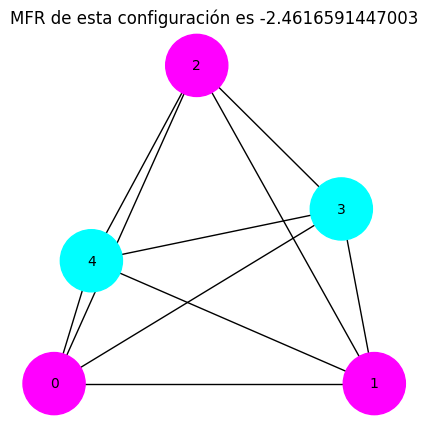

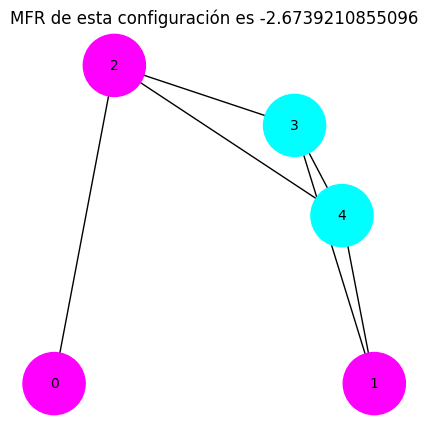

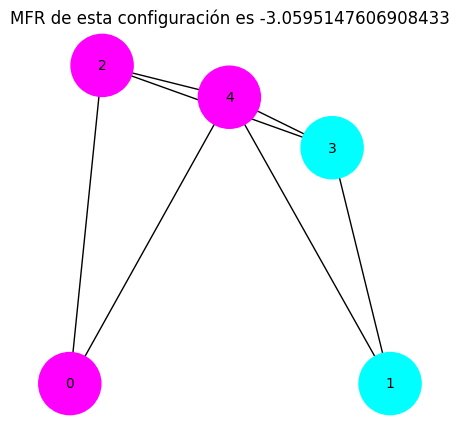

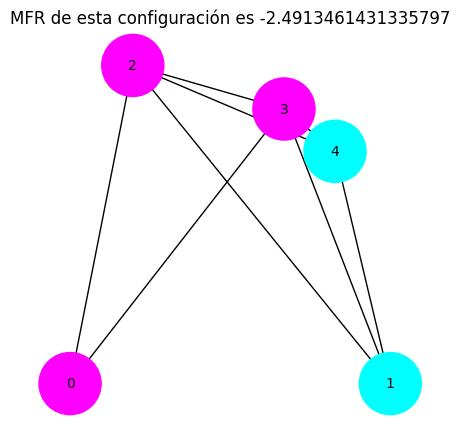

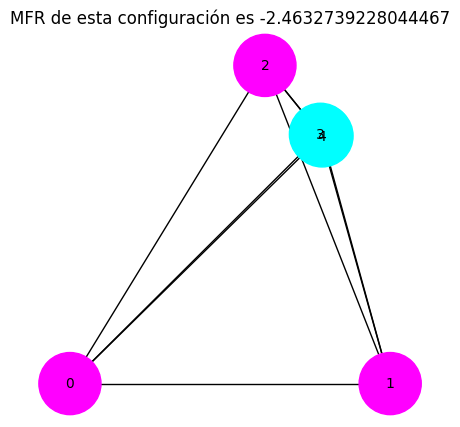

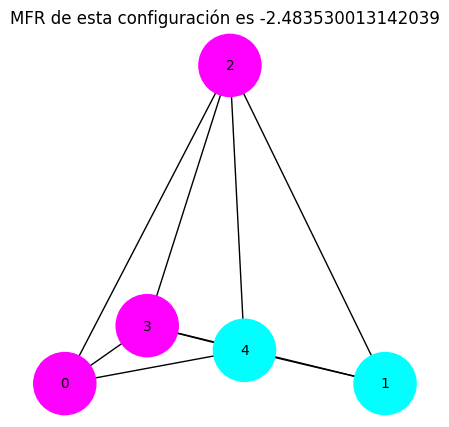

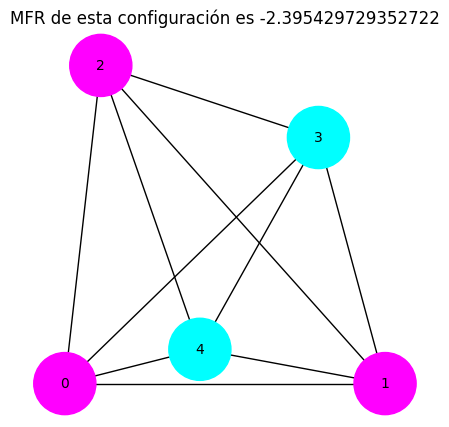

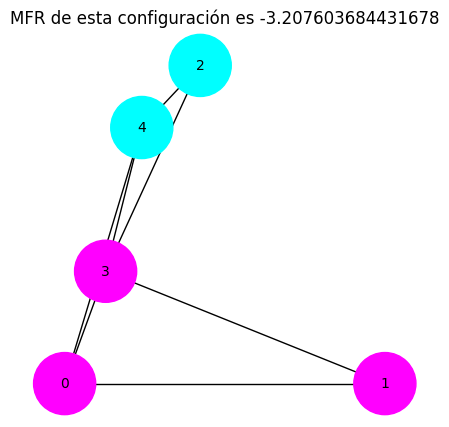

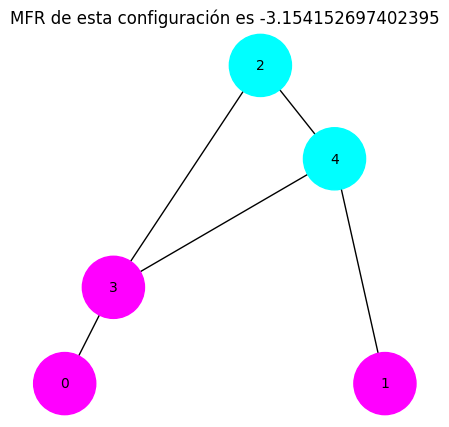

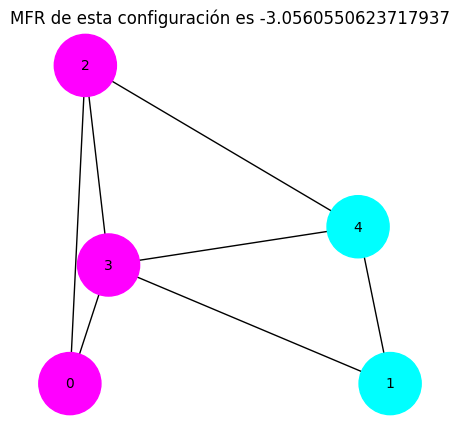

In [5]:
for i in range(len(train_dataset)):
    graph_plot(train_dataset[i].to('cpu'))

In [ ]:
+